#**Maestría en Inteligencia Artificial Aplicada**
##**Curso: Ciencia y analítica de datos**
###Tecnológico de Monterrey

# Actividad Semanal -- 6, visualización.

Alejandro Munguia Salazar A01104775

***************
Data Set Information:

This research aimed at the case of customers default payments in Taiwan and compares the predictive accuracy of probability of default among six data mining methods. From the perspective of risk management, the result of predictive accuracy of the estimated probability of default will be more valuable than the binary result of classification - credible or not credible clients. Because the real probability of default is unknown, this study presented the novel â€œSorting Smoothing Methodâ€ to estimate the real probability of default. With the real probability of default as the response variable (Y), and the predictive probability of default as the independent variable (X), the simple linear regression result (Y = A + BX) shows that the forecasting model produced by artificial neural network has the highest coefficient of determination; its regression intercept (A) is close to zero, and regression coefficient (B) to one. Therefore, among the six data mining techniques, artificial neural network is the only one that can accurately estimate the real probability of default.


Attribute Information:

This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables: 
X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit. 
X2: Gender (1 = male; 2 = female). 
X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others). 
X4: Marital status (1 = married; 2 = single; 3 = others). 
X5: Age (year). 
X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above. 
X12-X17: Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005. 
X18-X23: Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005. 


Relevant Papers:

Yeh, I. C., & Lien, C. H. (2009). The comparisons of data mining techniques for the predictive accuracy of probability of default of credit card clients. Expert Systems with Applications, 36(2), 2473-2480.



Citation Request:

Yeh, I. C., & Lien, C. H. (2009). The comparisons of data mining techniques for the predictive accuracy of probability of default of credit card clients. Expert Systems with Applications, 36(2), 2473-2480.


In [1]:
import pandas as pd
import numpy as np
from pprint import pprint
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


In [2]:
path = 'https://raw.githubusercontent.com/PosgradoMNA/Actividades_Aprendizaje-/main/default%20of%20credit%20card%20clients.csv'
df_original = pd.read_csv(path,index_col='ID')
pd.set_option('max_columns',None)
df = df_original.copy() 

In [3]:
pprint(df.head(7))
print('\n Hay observaciones tipo Nan: ' + str(df.isna().values.any()))
df.dropna(axis = 0, inplace=True) 
print('\n Hay observaciones tipo Nan: ' + str(df.isna().values.any()) + '\n')
pprint(df.info())
print('\n')


        X1   X2   X3   X4    X5   X6   X7   X8   X9  X10  X11       X12  \
ID                                                                        
1    20000  2.0  2.0  1.0  24.0  2.0  2.0 -1.0 -1.0 -2.0 -2.0    3913.0   
2   120000  2.0  2.0  2.0  26.0 -1.0  2.0  0.0  0.0  0.0  2.0    2682.0   
3    90000  2.0  2.0  2.0  34.0  0.0  0.0  0.0  0.0  0.0  0.0   29239.0   
4    50000  2.0  2.0  1.0  37.0  0.0  0.0  0.0  0.0  0.0  0.0   46990.0   
5    50000  1.0  2.0  1.0  57.0 -1.0  0.0 -1.0  0.0  0.0  0.0    8617.0   
6    50000  1.0  1.0  2.0  37.0  0.0  0.0  0.0  0.0  0.0  0.0   64400.0   
7   500000  1.0  1.0  2.0  29.0  0.0  0.0  0.0  0.0  0.0  0.0  367965.0   

         X13       X14       X15       X16       X17      X18      X19  \
ID                                                                       
1     3102.0     689.0       0.0       0.0       0.0      0.0    689.0   
2     1725.0    2682.0    3272.0    3455.0    3261.0      0.0   1000.0   
3    14027.0   13559.0   143

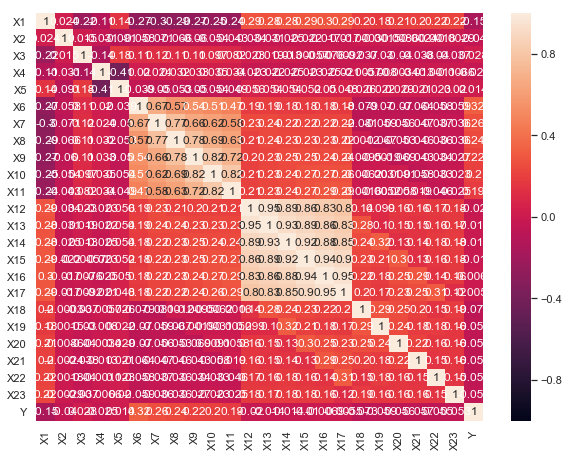

In [4]:
df.corr()

sns.set(rc = {'figure.figsize':(10,7.5)})
sns.heatmap(df.corr(), vmin = -1, vmax = 1,  annot= True)

# Las variables independientes que pertenecen a los cuadros mas claros (Corr positiva) y los de los mas oscuros (corr negativa) son info repetida

         X1   X2        X3        X4        X5   X6   X7   X8   X9  X10  X11  \
0  0.010101  1.0  0.333333  0.333333  0.051724  0.4  0.4  0.1  0.1  0.0  0.0   
1  0.111111  1.0  0.333333  0.666667  0.086207  0.1  0.4  0.2  0.2  0.2  0.4   
2  0.080808  1.0  0.333333  0.666667  0.224138  0.2  0.2  0.2  0.2  0.2  0.2   
3  0.040404  1.0  0.333333  0.333333  0.275862  0.2  0.2  0.2  0.2  0.2  0.2   
4  0.040404  0.0  0.333333  0.333333  0.620690  0.1  0.2  0.1  0.2  0.2  0.2   
5  0.040404  0.0  0.166667  0.666667  0.275862  0.2  0.2  0.2  0.2  0.2  0.2   
6  0.494949  0.0  0.166667  0.666667  0.137931  0.2  0.2  0.2  0.2  0.2  0.2   
7  0.090909  1.0  0.333333  0.666667  0.034483  0.2  0.1  0.1  0.2  0.2  0.1   
8  0.131313  1.0  0.500000  0.333333  0.120690  0.2  0.2  0.4  0.2  0.2  0.2   
9  0.010101  0.0  0.500000  0.666667  0.241379  0.0  0.0  0.0  0.0  0.1  0.1   

        X12       X13       X14       X15       X16       X17       X18  \
0  0.149982  0.069164  0.086723  0.160138  0

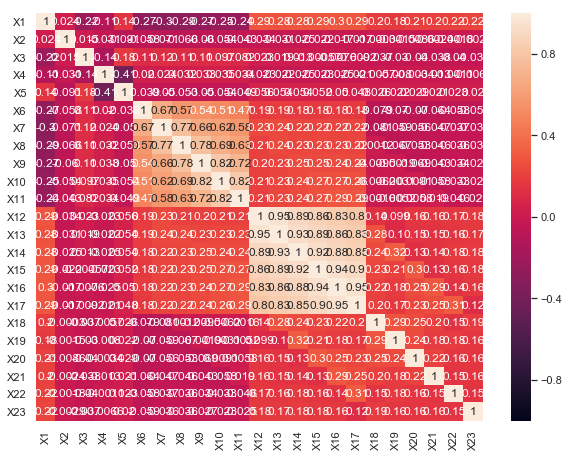

In [5]:
df_escalado = df_original.copy() 
df_escalado = df_escalado.drop(columns= 'Y',axis=1)
mms = MinMaxScaler()

### Con outliers
#df_escalado['X1'] = mms.fit_transform(df_escalado[['X1']])
#df_escalado['X5'] = mms.fit_transform(df_escalado[['X5']])
#for column in range(12, 24):
#    df_escalado['X' + str(column)] = mms.fit_transform(df_escalado[['X' + str(column)]])


## Sin outliers
df_escalado = pd.DataFrame(mms.fit_transform(df_escalado), columns = df_escalado.columns)


df_escalado.dropna(axis = 0, inplace=True)    
print(df_escalado.head(10))
print('\n Hay observaciones tipo Nan: ' + str(df.isna().values.any()) + '\n')
pprint(df_escalado.info())

sns.set(rc = {'figure.figsize':(10,7.5)})
sns.heatmap(df_escalado.corr(), vmin = -1, vmax = 1,  annot= True)

# Las variables independientes que pertenecen a los cuadros mas claros (Corr positiva) y los de los mas oscuros (corr negativa) son info repetida
#utilizo max min pero se podría usar otro StandardScaler() elegí max min porque quedan mas cercanas al rango 0 1 pensando en que es un problema de lcaisficación, pero 
# se necesita mas teoría, práctica o prueba y error.

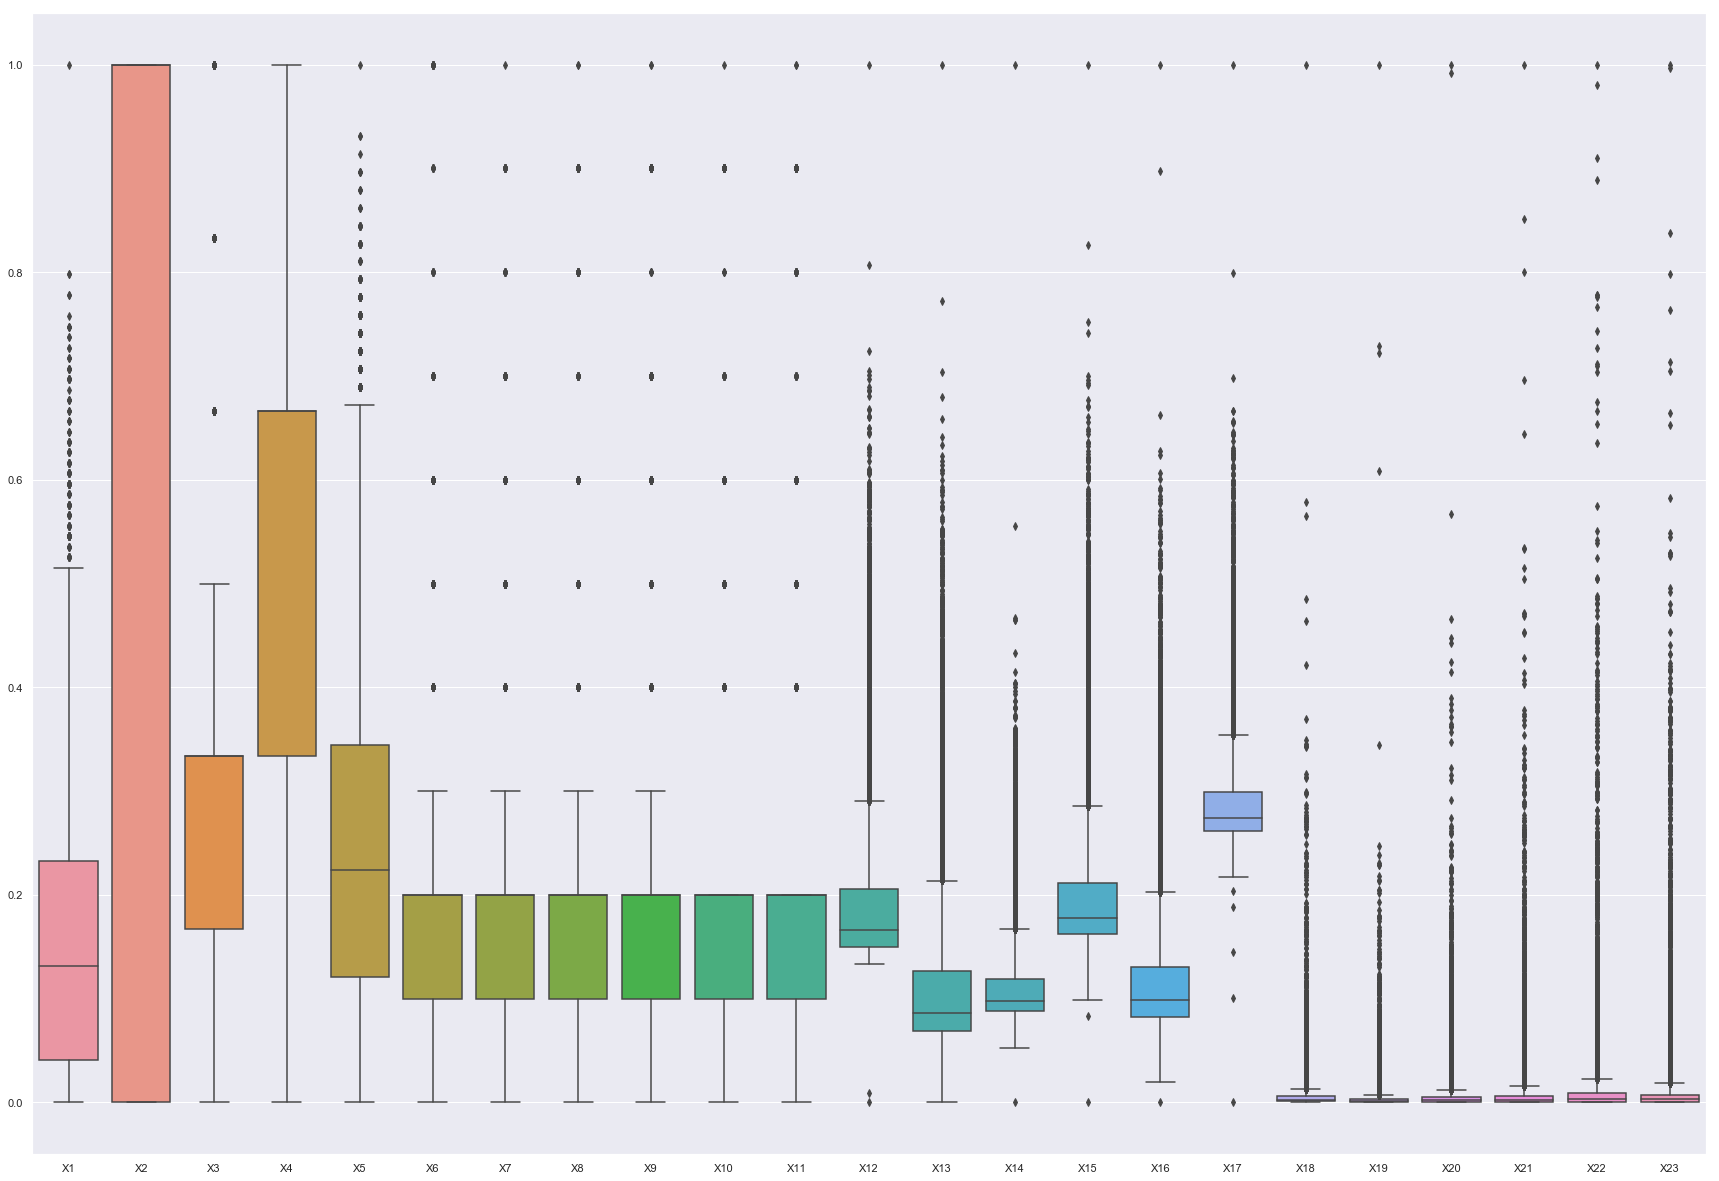

In [6]:
sns.set(rc = {'figure.figsize':(30,21)})
sns.boxplot( data=df_escalado)

# La gran mayotia de la información esta cntenida entre -2 y 2, hay presencia de outliers fuera de esos rangos para el df estandariazado.

In [7]:
#df_escalado[df_escalado > 2] = 2
#df_escalado[df_escalado < -2] = -2

#sns.set(rc = {'figure.figsize':(30,21)})
#sns.boxplot( data=df_escalado)


In [8]:
# bajo el supuesto de que la varianza nos dice que tanta información hay en cada variable y que esa, se ve influida por el rango, usaré df_escalado

for column in df_escalado.columns: 
    print('\nPara ' + str(column))
    print(' ')
    print('var       '+str(df_escalado[column].var()))
    print('max       '+str(df_escalado[column].max()))  
    print('min       '+str(df_escalado[column].min()))  
    print(df_escalado[str(column)].describe())
    print(' ')
    
    


Para X1
 
var       0.017173519818982533
max       1.0
min       0.0
count    29958.000000
mean         0.159147
std          0.131048
min          0.000000
25%          0.040404
50%          0.131313
75%          0.232323
max          1.000000
Name: X1, dtype: float64
 

Para X2
 
var       0.23918942896409098
max       1.0
min       0.0
count    29958.000000
mean         0.604012
std          0.489070
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: X2, dtype: float64
 

Para X3
 
var       0.017356793028725906
max       1.0
min       0.0
count    29958.000000
mean         0.308849
std          0.131745
min          0.000000
25%          0.166667
50%          0.333333
75%          0.333333
max          1.000000
Name: X3, dtype: float64
 

Para X4
 
var       0.03027044093872559
max       1.0
min       0.0
count    29958.000000
mean         0.517246
std          0.173984
min          0.000000
25%          0.333333
50%

**********
Aplicando los compenentes principales

In [9]:
pcs = PCA()
#Nota: Recuerda limpiar los valores vacíos de tu conjunto de datos antes de␣aplicar este paso. De lo contrario, te va a dar un error.
pcs_t = pcs.fit_transform(df_escalado)
pcs_t

array([[-4.03925034e-01, -7.82827819e-03, -2.41233810e-03, ...,
         9.26488839e-05,  3.61304411e-04, -6.33301972e-05],
       [-3.91711820e-01,  2.09029069e-01, -1.97100615e-01, ...,
        -9.45126535e-05,  4.99770782e-04, -4.89968831e-04],
       [-3.92399370e-01,  8.39500421e-02, -1.26643519e-01, ...,
        -5.16420831e-03, -1.18502940e-03, -3.90725291e-04],
       ...,
       [ 6.23723024e-01,  3.37779473e-01, -8.50557656e-02, ...,
         2.21945284e-03,  2.29649837e-06, -1.28118441e-03],
       [ 6.04007612e-01, -1.90695249e-02,  2.14271443e-01, ...,
        -1.24011134e-02, -8.25059429e-03, -9.89796763e-03],
       [ 6.09439088e-01,  1.04032934e-02,  2.33205594e-01, ...,
        -1.61079984e-05,  7.37514858e-03, -1.97555745e-03]])

In [10]:
pcs_labels = [f'PC_{i + 1}' for i in range(len(df_escalado.columns))]
pcsSummary_df = pd.DataFrame({
'% varianza explicada': np.round(pcs.explained_variance_ratio_,4) * 100,
'% varianza acumulada': np.cumsum(pcs.explained_variance_ratio_) * 100
})

pcsSummary_df.index = pcs_labels
pprint(pcsSummary_df)

print('\n')

# Comprobando que los PCA converva la infroamción de las orignales
pcs_df = pd.DataFrame(pcs_t, columns =pcs_labels)
print("Varianza total variables originales: ", df_escalado.var().sum())
print("Varianza total de los componentes: ", pcs_df.var().sum())

# EL 70 se da en el tercer componente.

       % varianza explicada  % varianza acumulada
PC_1                  55.29             55.286461
PC_2                  14.36             69.643660
PC_3                   9.39             79.034108
PC_4                   5.52             84.554705
PC_5                   3.84             88.393251
PC_6                   3.27             91.667929
PC_7                   2.14             93.805030
PC_8                   1.81             95.619892
PC_9                   1.26             96.875989
PC_10                  0.84             97.712105
PC_11                  0.62             98.332058
PC_12                  0.42             98.749347
PC_13                  0.31             99.059688
PC_14                  0.25             99.313293
PC_15                  0.23             99.544234
PC_16                  0.14             99.682023
PC_17                  0.10             99.781447
PC_18                  0.08             99.860722
PC_19                  0.06             99.916030


Dependiendo del tipo de análisis, hasta el componente 4 se contiene mas del 80%, como lo mencionan algunos autores, de información.
y hasta el 10 mas del 99

In [11]:
# En términos de variables

total_var = df_escalado.var().sum()
df_varianza = pd.DataFrame({
"Porcentaje Varianza": (df_escalado.var()/ total_var) * 100,
"Porcentaje Varianza Acumulado": (df_escalado.var().cumsum() / total_var) *100
})

pprint(df_varianza)


### se hubiera tenido que usar casi todas para lograr el 99% de información, en lugar de 10

     Porcentaje Varianza  Porcentaje Varianza Acumulado
X1              3.958416                       3.958416
X2             55.132040                      59.090455
X3              4.000659                      63.091115
X4              6.977194                      70.068309
X5              5.817449                      75.885758
X6              2.911965                      78.797723
X7              3.303500                      82.101223
X8              3.297185                      85.398408
X9              3.146728                      88.545135
X10             2.955222                      91.500357
X11             3.044604                      94.544962
X12             0.979659                      95.524621
X13             1.052734                      96.577354
X14             0.334509                      96.911864
X15             0.847319                      97.759183
X16             0.838470                      98.597653
X17             0.483250                      99

In [12]:
comps_df = abs(pd.DataFrame(
pcs.components_.round(4),
columns = pcs_df.columns, 
index = df_escalado.columns))

print(comps_df.iloc[:,:10].head())

      PC_1    PC_2    PC_3    PC_4    PC_5    PC_6    PC_7    PC_8    PC_9  \
X1  0.0084  0.9983  0.0029  0.0115  0.0318  0.0172  0.0222  0.0211  0.0191   
X2  0.2082  0.0444  0.0893  0.0775  0.0929  0.3230  0.4028  0.4168  0.4118   
X3  0.1066  0.0151  0.2013  0.7459  0.6059  0.0373  0.0462  0.0439  0.0453   
X4  0.6375  0.0054  0.3774  0.1011  0.0020  0.0244  0.0054  0.0103  0.0326   
X5  0.0218  0.0205  0.5468  0.6055  0.5334  0.0233  0.0299  0.0355  0.0360   

     PC_10  
X1  0.0172  
X2  0.3919  
X3  0.0411  
X4  0.0530  
X5  0.0362  


In [13]:
# Las variables mas importantes son:
pprint(comps_df.iloc[:,:10].idxmax().sort_values())

PC_2      X1
PC_7     X10
PC_9     X10
PC_8     X11
PC_10    X12
PC_4      X3
PC_5      X3
PC_3      X6
PC_1      X8
PC_6      X9
dtype: object


In [14]:
# Las variables menos importantes son:
pprint(comps_df.iloc[:,:10].idxmin().sort_values())

PC_2     X13
PC_8     X16
PC_10    X20
PC_3     X21
PC_1     X22
PC_4     X22
PC_5     X22
PC_7     X22
PC_6     X23
PC_9     X23
dtype: object


In [15]:
df_mv = df_escalado[['X1','X10','X11','X12','X3','X6','X8','X9']]
df_mv.head()

,X1,X10,X11,X12,X3,X6,X8,X9
0,0.010101,0.0,0.0,0.149982,0.333333,0.4,0.1,0.1
1,0.111111,0.2,0.4,0.148892,0.333333,0.1,0.2,0.2
2,0.080808,0.2,0.2,0.172392,0.333333,0.2,0.2,0.2
3,0.040404,0.2,0.2,0.188100,0.333333,0.2,0.2,0.2
4,0.040404,0.2,0.2,0.154144,0.333333,0.1,0.1,0.2


Para las variables mas importantes, El Hist sería: 
X1
X10
X11
X12
X3
X6
X8
X9


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000016D2A136358>,
      dtype=object)

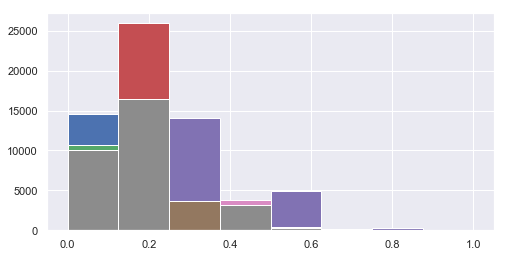

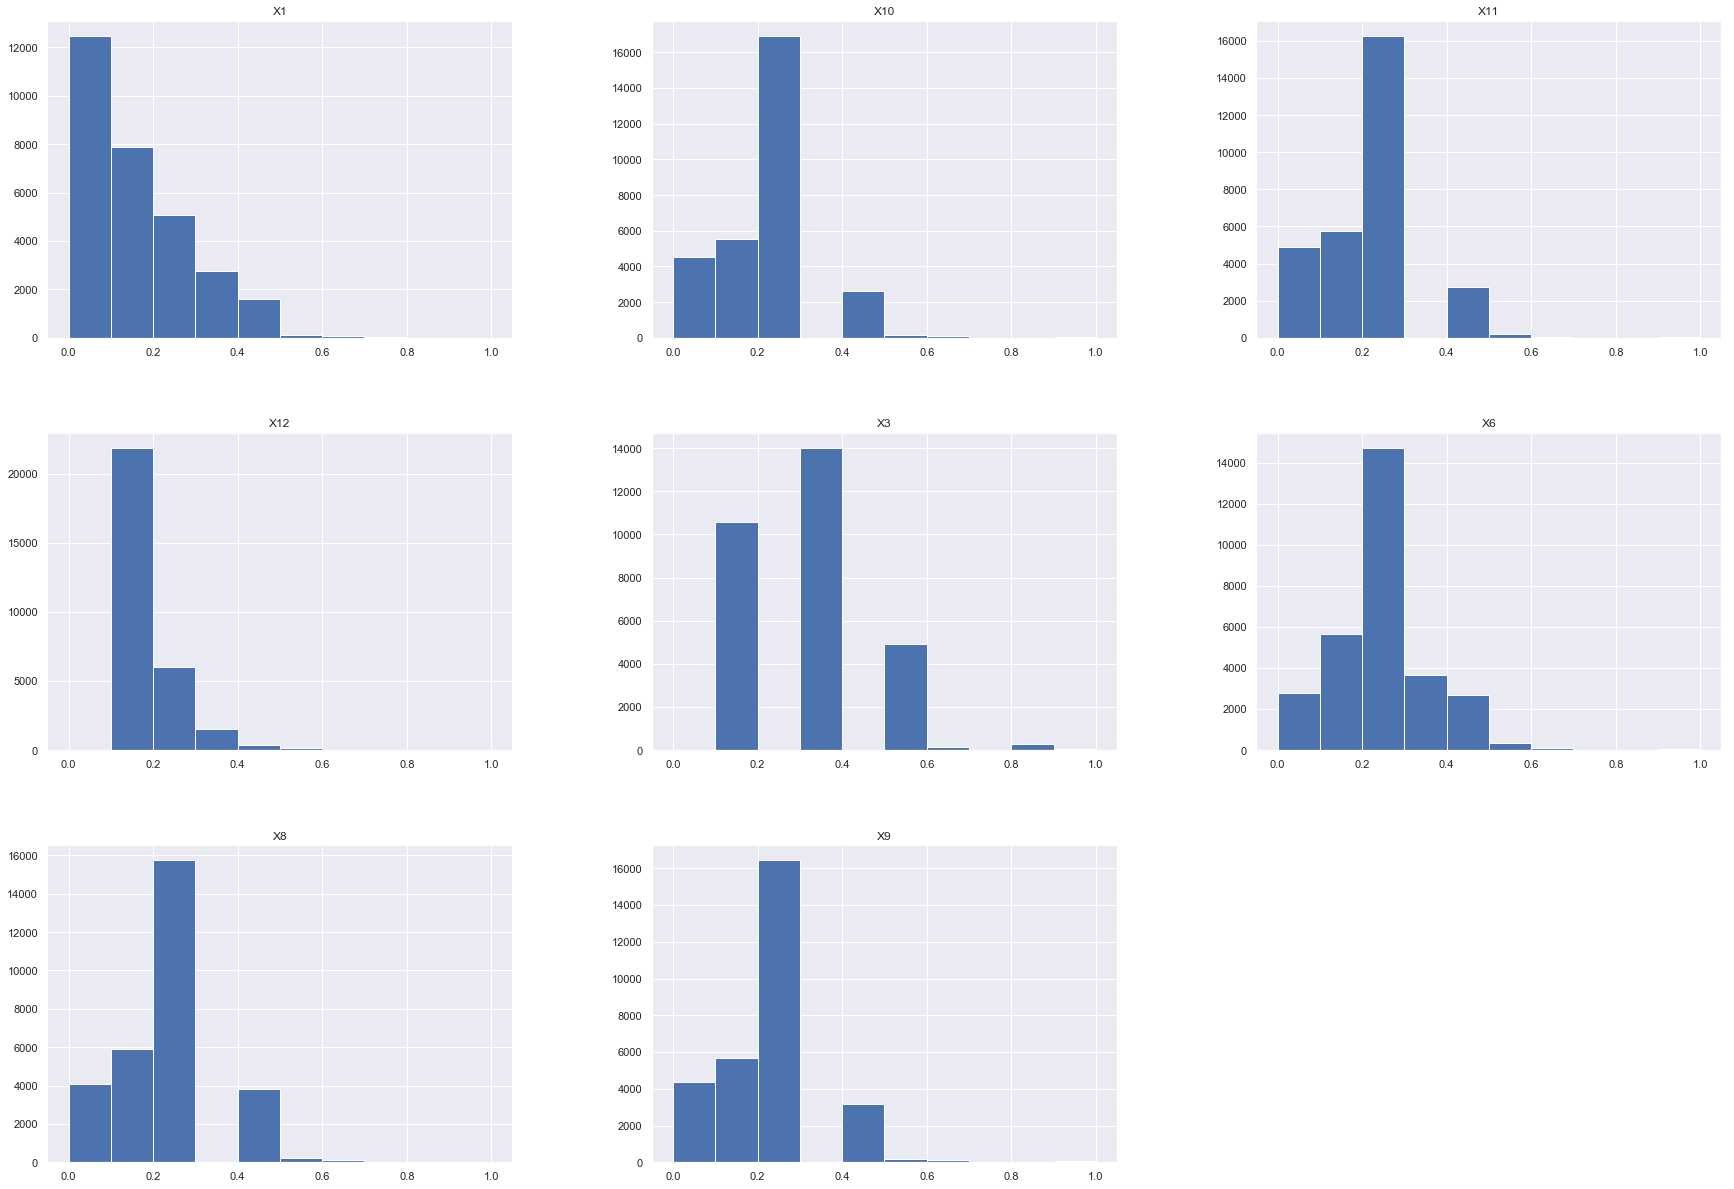

In [16]:
print("Para las variables mas importantes, El Hist sería: ")
for column in df_mv:
    print(column)
    df_mv[column].hist(bins=8,figsize=(8,4))
    
df_mv.hist()

Se puede observar para X1 Y X12 que aun presentan sesgo, y que las demas ya estan relativamente normalizadas, así como la importancia de X1 y la correlacion entre x8 y x9 así como, X10 y X11.

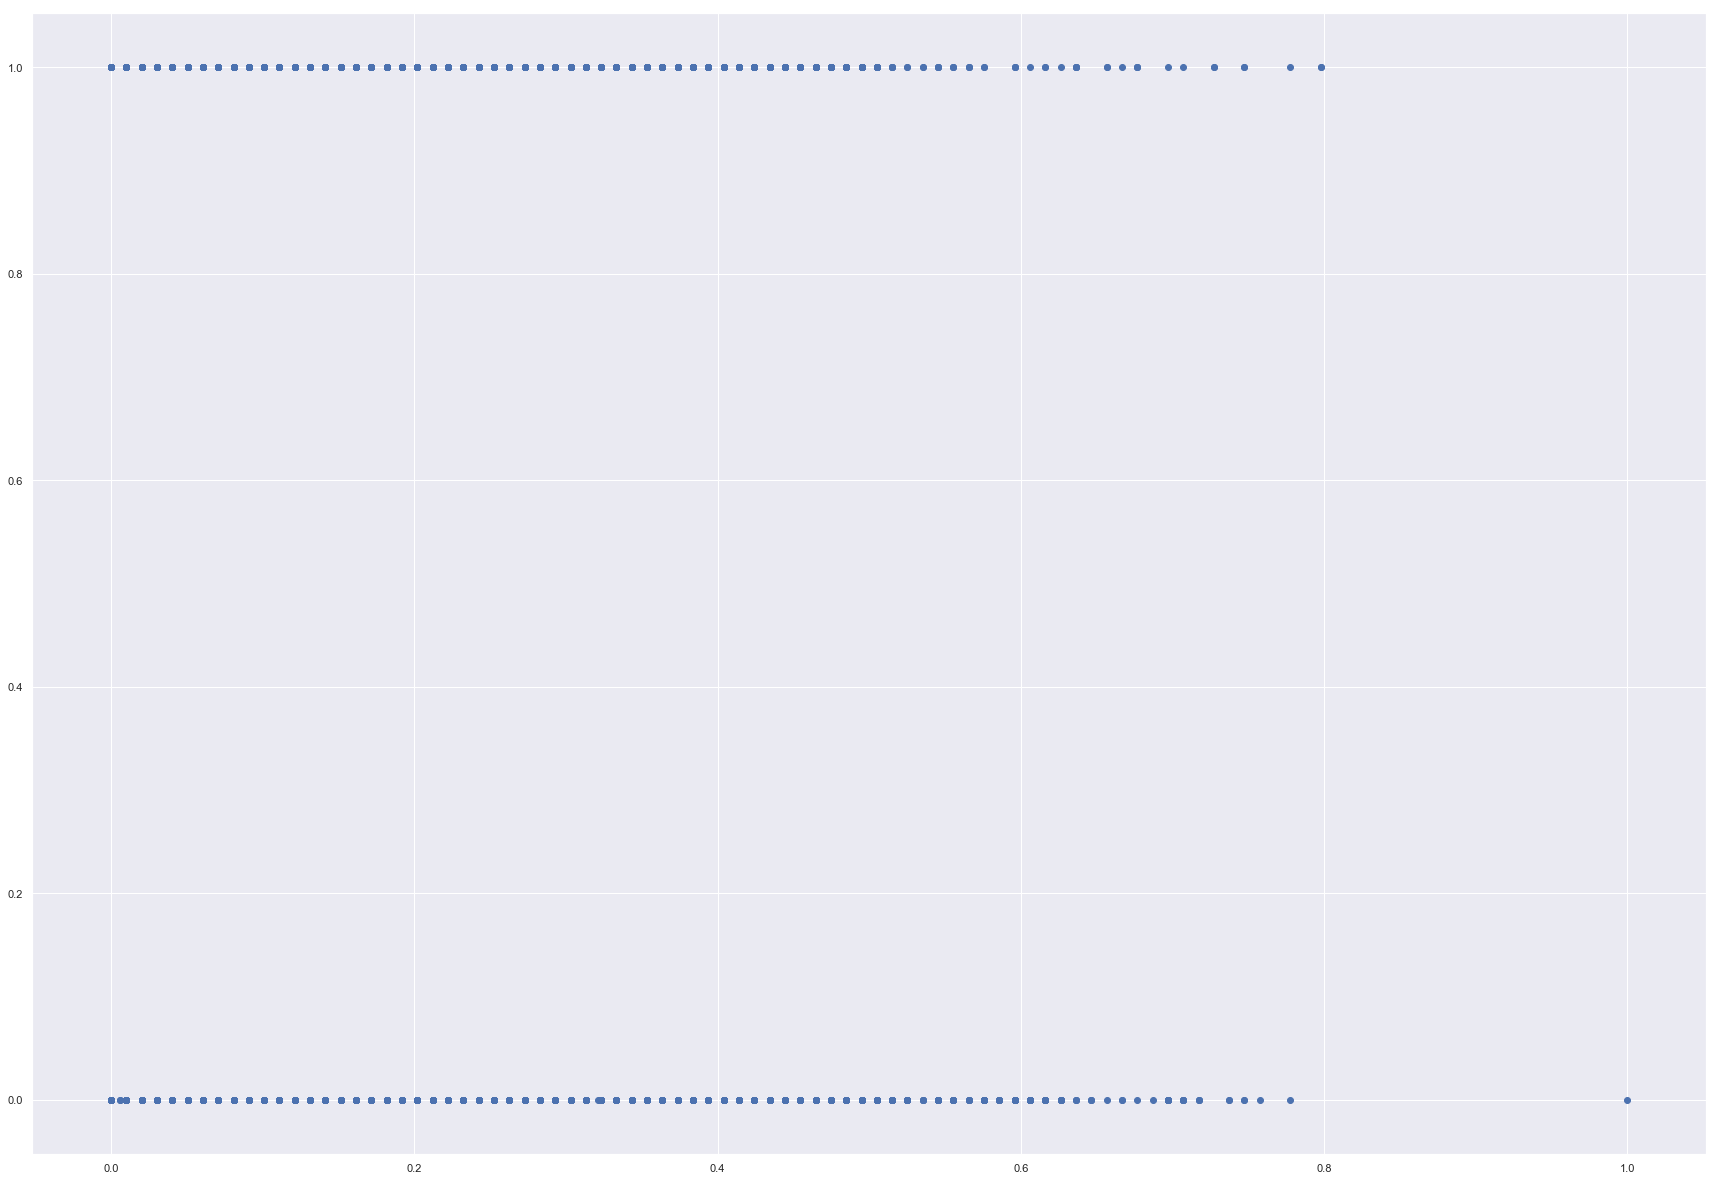

In [17]:
df_mv_y =  df_mv.merge(
    df['Y'],
    left_index = True,
    right_index = True,
)

plt.scatter(df_mv_y['X1'], df_mv_y['Y'])



Para el caso de una Schatter, al ser un problema de clasificación todas tenrán Y en 0  y 1 por lo que para cada variable tiene la forma siguiente:
podría ser de ayuda para comprobar que en un modelo de clases desvalanceadas, el modelo no haga trampa sobre la clase positiva, esto para cada variable por lo que solo dejo una gráfica de muestra.

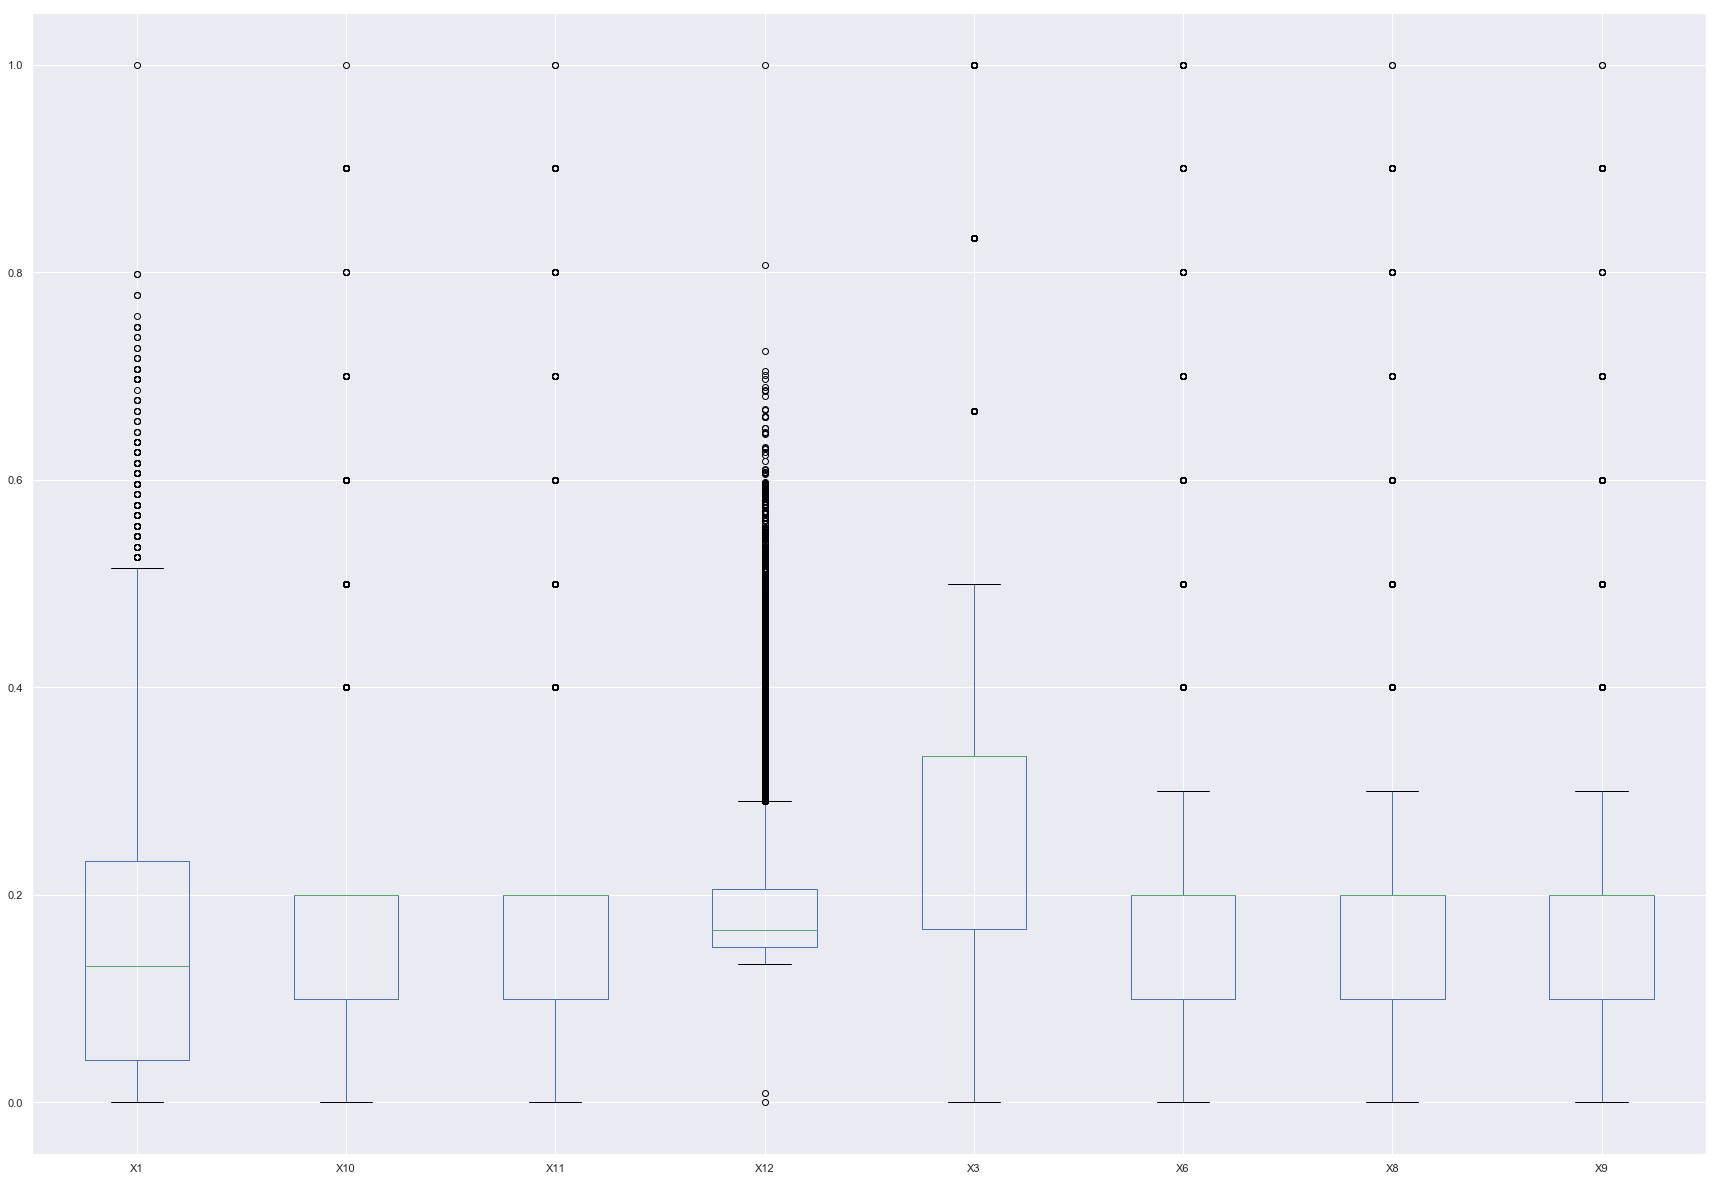

In [18]:
df_mv.boxplot()

Sirve observan concentraciones de datos de las variables, en este ejemplo: las mas estables en X6,X8,X9, asi como mayor cantidad de outliers para X12

0.0    23311
1.0     6620
Name: Y, dtype: int64


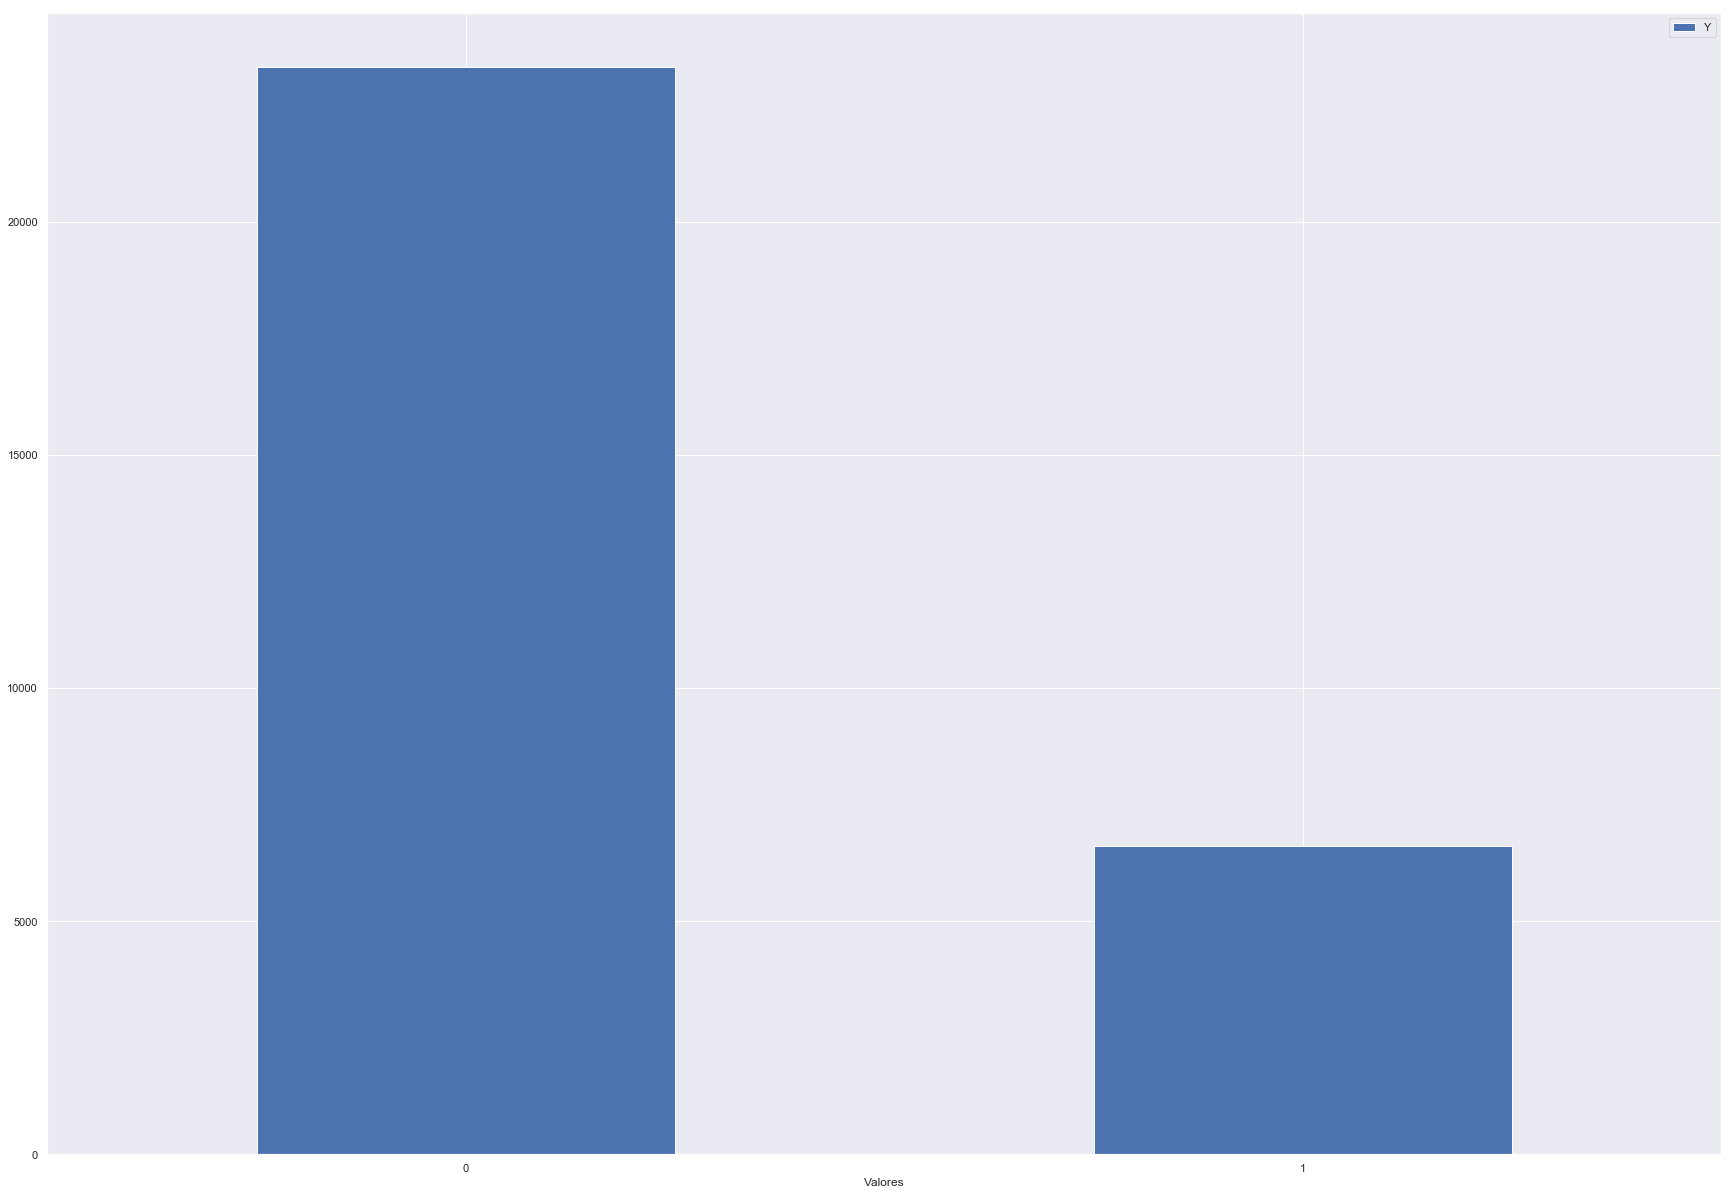

In [19]:
print(df_mv_y['Y'].value_counts())
df_mv_y['Y'].value_counts()
df = pd.DataFrame({'Valores':['0', '1'], 'Y':[df_mv_y['Y'].value_counts()[0], df_mv_y['Y'].value_counts()[1]]})
ax = df.plot.bar(x='Valores', y='Y', rot=0)

Se puede observar que hay mas valores de 0, por lo que se puede sugerir en caso de que la variable de interes sea la clasificación resultante en 1, el enfoque de clases desbalanceadas como podría ser que el asignar a una persona morosa la tarjeta sea mas costoso que no darsela a un buen cliente.

### Fuentes: 

1. Material provisto en clase, recuperado el 31/10/22 de: https://experiencia21.tec.mx/courses/320440/assignments/10359568
2. Effective Data Visualization Techniques in Data Science Using Python (2022), recuperado el 31/10/22 de:analyticsvidhyahttps://www.analyticsvidhya.com/blog/2021/08/effective-data-visualization-techniques-in-data-science-using-python/
3. Yeh, I. C., & Lien, C. H. (2009). The comparisons of data mining techniques for the predictive accuracy of probability of default of credit card clients. Expert Systems with Applications, 36(2), 2473-2480.